<a href="https://www.kaggle.com/code/nguyenductam/pandas-reshaping-data?scriptVersionId=144265177" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 style="color:DodgerBlue;">  <b>Introduction to Data Reshaping</b>  </h1>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2 style="color:Tomato;"><b>I<i>.Wide and long data formats</i></b></h2>

### You will learn
* Wide and long formats
* Long to wide transformation
* Stacking and unstacking columns
* Reshaping and handling complex data, such as string columns or JSON data

### Why it is important
* Tidy datasets
* Data is not in the appropriate format for analysis:
* Human readable vs. statistical analysis
* Nested data in DataFrames is complex to handle
* Get summary statistics for multi-level index DataFrames

[Wide and long data formats](https://campus.datacamp.com/courses/reshaping-data-with-pandas/introduction-to-data-reshaping?ex=1)

<h3 style="color:MediumSeaGreen;"> Reshaping data</h3>
**Transforming a DataFrame or Series structure to adjust it for analysis** 
1.       *Transposing a DataFrame*

In [ ]:
df = pd.read_csv('/kaggle/input/dataplot1/data1.csv')
name_data1 = df.set_index('Name')
name_data2 = name_data1.reset_index()
name_data3 = name_data1.reset_index(drop = True)

In [ ]:
name_data1

In [ ]:
name_data2

In [ ]:
name_data3

**To transform rows to columns and so on !**

In [ ]:
name_data1[["Year", "Weight"]]

In [ ]:
name_data1[["Year", "Weight"]].transpose()

<h3 style="color:MediumSeaGreen;"> Wide to long transforation</h3>
* Performed using **pandas** functions, such as
    * `.melt()`
    * `.wide_to_long()`

<h3 style="color:MediumSeaGreen;"> Long to wide format</h3>
* Transform data using pandas methods, for example:
    * `.pivot()`
    * `.pivot_table()`

<h4 style="color:Orange;"> Flipping players</h4>

> Congratulations! You got the data scientist job! In your first project, you will work with the `fifa_players` dataset. It contains data of the players included in the last version of the video game. Before you start to do any analysis, you need to clean and format your dataset.
> 
> As a first step, you need to explore your dataset and reshape it using basic steps, such as setting different indices, filtering columns and flipping the DataFrame. You would like to see if that is enough for further analysis.
> 
> The `fifa_players` dataset is available for you. The `pandas` module will be preloaded as pd in your session throughout all the exercises of the course.

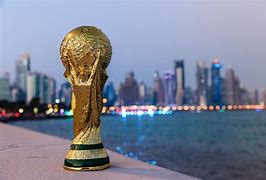

In [ ]:
fifa_players = pd.read_csv("/kaggle/input/dataplot3/data2.csv")

##### Instructions 1/3
* Set the index of `fifa_players` to be the `name` column and assign it to `fifa_transpose`.

In [ ]:
fifa_transpose = fifa_players.set_index("name")
fifa_transpose

##### Instructions 2/3
* Modify the code to select only the columns `height` and `weight` from the `fifa_players` DataFrame.

In [ ]:
# Modify the DataFrame to keep only height and weight columns
fifa_transpose = fifa_players.set_index('name')[["height", "weight"]]

# Print fifa_transpose
fifa_transpose

##### Instructions 3/3
* Finally, transpose the `fifa_players` DataFrame so that the rows become columns and the columns become rows.

In [ ]:
# Change the DataFrame so rows become columns and vice versa
fifa_transpose = fifa_players.set_index('name')[['height', 'weight']].transpose()

# Print fifa_transpose
fifa_transpose

<h2 style="color:Tomato;"><b>II<i>.Reshaping using pivot method</i></b></h2>
<h3 style="color:MediumSeaGreen;"> From long to wide</h3>

* > Demonstrate relationship between two columns
* > Time series operations with the variables
* > Operation that requires columns to be the unique variable


<h3 style="color:MediumSeaGreen;"> Pivot method:</h3>

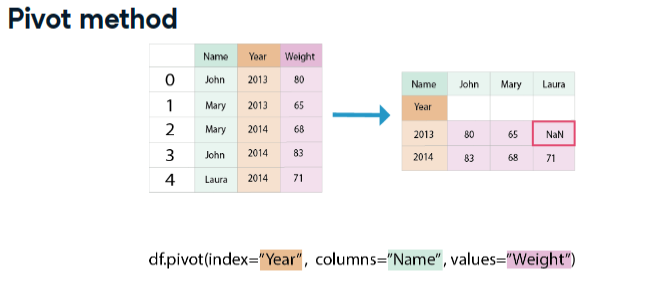

In [ ]:
name_data1.reset_index().pivot(index="Year", columns = "Name", values = "Weight")

<h3 style="color:MediumSeaGreen;">Pivoting a dataset</h3>

In [ ]:
fifa = pd.read_csv("/kaggle/input/redataplot3/data3.csv")

In [ ]:
#Print fifa data
fifa

In [ ]:
fifa.pivot(index='name', columns='variable', values='metric_system')

<h3 style="color:MediumSeaGreen;">Pivoting multiple columns</h3>

In [ ]:
fifa.pivot(index='name', columns='variable', values=['metric_system', 'imperial_system'])

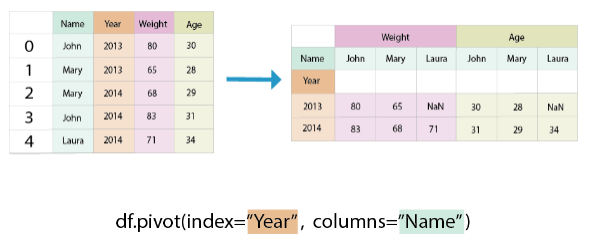

In [ ]:
fifa.pivot(index = "name", columns = "variable", values = ["metric_system", "imperial_system"])

<h3 style="color:MediumSeaGreen;">Duplicate entries error</h3>

In [ ]:
another_fifa = pd.read_csv("/kaggle/input/redataplot4/data4.csv")
another_fifa.head()

<h4 style="color:Orange;"> Dribbling the pivot method</h4>

> It's time to keep working with the `fifa_players` dataset. After you explored the dataset, you realized the dataset contains player scores on different movements: shooting, dribbling, and passing. There are attacking scores as well as overall scores.
> 
> The goal of the project is to analyze the scores to create an optimized team, so you decide to explore which score is better. But the current data is in a long format. You'll need to to pivot your DataFrame in different ways to discover a pattern.
> 
> The `fifa_players` dataset is available for you. Make sure to examine it in the console!

![](https://th.bing.com/th/id/OIP.BLHLXyTBZezLySsaHS7NWQHaEK?w=328&h=184&c=7&r=0&o=5&pid=1.7)

**Instructions 1/3**

In [ ]:
fifa_playerss = pd.read_csv("/kaggle/input/redataplot5/data5.csv")

1. Pivot `fifa_players` to get a DataFrame with `overall` scores indexed by `name`, and identified by `movement` in the columns.

In [ ]:
# Pivot fifa_players to get overall scores indexed by name and identified by movement
fifa_overall = fifa_playerss.pivot_table(values = "overall", index = "name", columns = "movement")
# Print fifa_overall
fifa_overall

2. Pivot `fifa_players` to get a DataFrame with `attacking` scores indexed by `name`, and identified by `movement` in the columns.

In [ ]:
# Pivot fifa_players to get attacking scores indexed by name and identified by movement
fifa_attacking = fifa_playerss.pivot_table(index = "name", values = "attacking", columns = "movement")
# Print fifa_attacking
fifa_attacking

3. Use  `.pivot()` on `fifa_players` to get `overall` scores indexed by `movement`, and identified by `name` in the columns. 

In [ ]:
# Use the pivot method to get overall scores indexed by movement and identified by name
fifa_names = fifa_playerss.pivot(index = "movement", values = "overall", columns = "name")
# Print fifa_names
fifa_names

<h4 style="color:Orange;">Offensive or defensive player?</h4>

> You're not convinced with your previous exploration - you've discovered patterns in the `attacking` and `overall` scores in `fifa_players`. You would like to compare both scores, so you would like to see both in the same DataFrame.
> 
> To do this, you'll need a way to pivot more than one column. You remember you can achieve this goal in two different ways: you could pivot the DataFrame using the list with the two columns, or you could extend the `.pivot()` method to all the columns present in the dataset.
> 
> The `fifa_players` dataset is available for you. *Make sure to examine it in the console!*

1. Pivot `fifa_players` to get `overall` and `attacking` scores indexed by `name`, and identified by `movement` in the columns.

In [ ]:
# Pivot fifa_players to get overall and attacking scores indexed by name and identified by movement
fifa_over_attack = fifa_playerss.pivot(index = "name",values = ["overall", "attacking"], columns = "movement")
# Print fifa_over_attack
fifa_over_attack

2. Use the `.pivot()` method on `fifa_players` to get all the scores indexed by `name`,and identified by `movement` in the columns.

In [ ]:
# Use pivot method to get all the scores index by name and identified by movement
fifa_all = fifa_playerss.pivot(index = "name", columns = "movement")
# Print fifa_over_attack
fifa_all

<h4 style="color:Orange;">Replay that last move!</h4>

> Amazing! You were able to pivot all columns of `fifa_players`. You saw that the overall and attacking scores are different and decided to extend your analysis to more players. However, you found an error.
> 
> You suspect that there are different scores for the same index and column values. You remember that using the `.pivot()` method for all the columns does not work in that case.
> 
> First, you decide to delete the problematic row so you can reshape the DataFrame afterwards.
> 
> The `fifa_players` dataset is available for you. Make sure you examine the dataset into the console and notice the repeated rows.

1. Drop the fifth row of the `fifa_players` DataFrame.

In [ ]:
# Drop the fifth row to delete all repeated rows
fifa_no_rep = fifa_playerss.drop(4, axis=0)

# Print fifa_pivot
fifa_no_rep 

2. Pivot `fifa_no_rep` to get all the scores indexed by `name`, and identified by `movement` in the columns.

In [ ]:
# Pivot fifa players to get all scores by name and movement
fifa_pivot = fifa_no_rep.pivot(index = "name", columns = "movement")
# Print fifa_pivot
fifa_pivot

<h2 style="color:Tomato;"><b>III<i>.Pivot tables</i></b></h2>

<h3 style="color:MediumSeaGreen;">Pivot method limitations</h3>

`another_fifa.head()`
<p style="background-color:Gray;">Traceback (most recent call last): ValueError: Index contains duplicate entries, cannot reshape</p>

<h3 style="color:MediumSeaGreen;">Pivot method limitations</h3>

> * General purpose pivoting
> * Index/column pair must be unique
> * Cannot aggregate values
> 

**A DataFrame containing statistics that summarizes the data of a larger DataFrame**


In [ ]:
name_data2.pivot_table(values="Weight", index="Year", columns="Name", fill_value = 0)

<h3 style="color:MediumSeaGreen;">Hierarchical indexes</h3>

In [ ]:
fifa_playerss.head(6)

In [ ]:
fifa_playerss.pivot_table(index=["name"], columns="movement", values=["overall", "attacking"], aggfunc="max")

In [ ]:
fifa_playerss.pivot_table(index=["name"], columns="movement", aggfunc="count", margins=True)

**Pivot or pivot table?**
> *Does the DataFrame have more than one value for each index/column pair?*

> *Do you need to have a multi-index in your resulting pivoted DataFrame?*

> *Do you need summary statistics of your large DataFrame?*

**Yes**! Use `.pivot_table()`


<h4 style="color:Orange;">Reviewing the moves</h4>

> **Wow**! You have now learned about pivot tables. In the last analysis that you did, you encountered a DataFrame that had non-unique index/column pairs. In order to pivot your DataFrame, you wrote code to drop the last row, and then reshaped it.

> In this exercise, you will modify the code using pivot tables and compare it with your **strategy of using the pivot method**.

> The `fifa_players` dataset is available for you.

**Instructions**
> Discard the fifth row of the fifa_players DataFrame.
> Use `.pivot()` on `fifa_players` to get all the scores indexed by `name`, and identified by `movement` in the columns.
> Use a pivot table to show the ***mean*** of all scores by `name` and `movement`, setting `name` as index.

In [ ]:
# Discard the fifth row to delete all repeated rows
fifa_drop = fifa_playerss.drop(4, axis = 0)

# Use pivot method to get all scores by name and movement
fifa_pivot = fifa_drop.pivot(index = ["name"], columns = ["movement"]) 

# Print fifa_pivot
fifa_pivot  

In [ ]:
# # Use pivot table to get all scores by name and movement
fifa_pivot_table = fifa_playerss.pivot_table(index=["name"], 
                                     columns=["movement"], 
                                     aggfunc=["mean"])
# Print fifa_pivot_table
fifa_pivot_table

In [ ]:
fifa_drop = fifa_players.drop(4, axis = 0)
fifa_drop

<h4 style="color:Orange;">Exploring the big match</h4>

> Now, it's time to continue working on the `fifa_players` exploration. Your next task is to examine the characteristics of players belonging to different teams.

> Particularly, you are interested in players from two big rival teams: Barcelona and Real Madrid.

> You decide that `.pivot_table()` is the best tool to get your results since it's an easy way to generate a report. Also, it allows you to define aggregation functions and work with multiple indices.

> The `fifa_players` dataset is available for you. _Make sure you explore it. Check which data it contains from the players playing for each team.

In [ ]:
fifa_players_info = pd.read_csv("/kaggle/input/dataplot6/player.csv")
fifa_players_info

1. Use a pivot table to show the mean age of players in `fifa_players_info` by `club` and `nationality`. Set `nationality` as the index.

In [ ]:
# Use pivot table to display mean age of players by club and nationality 
mean_age_fifa = fifa_players.pivot_table(index="nationality", 
                                  columns="club", 
                                  values="age", 
                                  aggfunc="mean")

fifa_players

2. Use a pivot table to show the maximum height of any player by `club` and `nationality`, setting `nationality` as the index.

In [ ]:
# Use pivot table to display max height of any player by club and nationality
tall_players_fifa = fifa_players_info.pivot_table(index="nationality", 
                                     columns="club", 
                                      values="height", 
                                      aggfunc="max")

# Print tall_players_fifa
tall_players_fifa

3. Define the DataFrame `players_country` that shows the player count by `club` and `nationality` and get the total count.

In [ ]:
# Use pivot table to show the count of players by club and nationality and the total count
players_country = fifa_players_info.pivot_table(index="nationality", 
                                    columns="club", 
                                    values="id", 
                                    aggfunc="count", 
                                    margins=True)

# Print players_country
players_country

<h4 style="color:Orange;">The tallest and the heaviest</h4>

> You will continue your exploration of characteristics of players in `fifa_players` belonging to two teams: FC Barcelona and Real Madrid. As your last task, you are interested in exploring the maximum height and weight separated by teams and nationality. You will also compare two years, 2000 and 2010.
 
> You have two columns that you want to set as an index, so you will need to use `pivot_table()`.

> The `fifa_players_intel` dataset is available for you. It contains data about the `club`, `nationality`, `height`, `weight`, and `year` of the players playing for each team.

In [ ]:
fifa_players_intel = pd.read_csv("/kaggle/input/dataplot7/data6.csv")
fifa_players_intel

1. Use a pivot table to get all the values in the year column of the `fifa_players` DataFrame, setting `nationality` and `club` as index.

In [ ]:
# Define a pivot table to get the characteristic by nationality and club
fifa_mean = fifa_players_intel.pivot_table(index=["nationality", "club"], 
                                     columns= "year")

# Print fifa_mean
fifa_mean

2. Pass the appropriate function to `.pivot_table()` to show the maximum values of the `year` columns.

In [ ]:
# Set the appropriate argument to show the maximum values
fifa_mean = fifa_players_intel.pivot_table(index=['nationality', 'club'], 
                                     columns='year', 
                                     aggfunc="max")

# Print fifa_mean
fifa_mean

3. Set the appropriate argument in `.pivot_table()` to get the maximum for each row and column.

In [ ]:
fifa_mean = fifa_players_intel.pivot_table(index=['nationality', 'club'], 
                                     columns='year', 
                                     aggfunc='max', 
                                     margins=True)
fifa_mean

<h2 style="color:Tomato;"><b>IV<i>.Reshaping with melt</i></b></h2>

> * Perform analytics

> * Plot different variables in the same graph


<h3 style="color:MediumSeaGreen;">Wide to long transformation</h3>

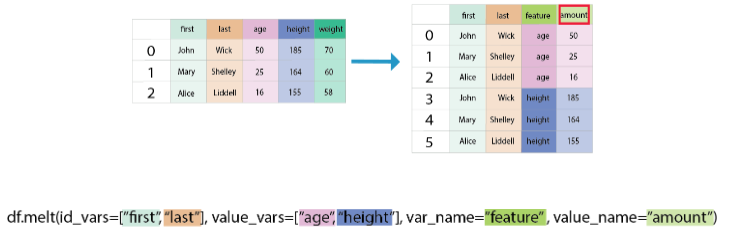

In [ ]:
fifa_players_intel.melt(id_vars=["club", "nationality"], value_vars=["year", "height", "weight"], var_name="Feature", value_name="amount")

<h4 style="color:Orange;">Gothic times</h4>

> You have a new project! Your boss has asked you to perform an analysis with a dataset of books. You have several tasks to complete. Your first task is to analyze Gothic fiction books.
> 
> The dataset `books_gothic` is in a wide format. Any analysis will require you to reshape the data into a long format. To that aim, you will melt your dataset. You will reshape the dataset using several variables as identifiers to decide which is the best format.
> 
> The `books_gothic` dataset is available for you. Make sure to examine it in the console!

![](https://th.bing.com/th/id/OIP.tIzqMatXK3NgA-o4fpm1eAHaLQ?w=202&h=308&c=7&r=0&o=5&dpr=1.3&pid=1.7)

In [ ]:
books_gothic = pd.read_csv("/kaggle/input/bookgothic/books_gothicc.csv")
books_gothic

1. Define a `gothic_melted` DataFrame by melting the `books_gothic` DataFrame, using only the `title` as an identifier variable.

In [ ]:
# Melt books_gothic using the title column as identifier 
gothic_melted = books_gothic.melt(id_vars="title")

# Print gothic_melted
gothic_melted

2. Melt the `books_gothic` DataFrame, now using the `title`, `authors`, and `publisher` columns as identifier variables.

In [ ]:
# Melt books_gothic using the title, authors, and publisher columns as identifier
gothic_melted_new = books_gothic.melt(id_vars=["title","authors","publisher"])

# Print gothic_melted_new
gothic_melted_new

<h4 style="color:Orange;">Rating is not everything</h4>

> Your first exploration of the `books_gothic` dataset was successful. Now, your next task is to perform a more detailed analysis. You need to reshape your DataFrame again. This time, you don't want to use all of your variables.
 
> To that aim, you will melt your DataFrame, taking several approaches using different columns as identifiers and value variables.
 
> The same books_gothic dataset you used before is available for you. It contains data about the `title`, `author`, `number_pages`, `rating`, `rating_count`, and `publisher` of each book. Make sure to examine it in the console!

1. Define a new DataFrame by melting the `publisher` **column** using the `title` and `authors` columns as identifier variables.

In [ ]:
# Melt publisher column using title and authors as identifiers
publisher_melted = books_gothic.melt(id_vars=['title', 'authors'], 
                                     value_vars='publisher')

# Print publisher_melted
publisher_melted

2. Melt the `rating` and `rating_count` columns of `books_gothic` DataFrame using the `title` column as an identifier variable.

In [ ]:
# Melt rating and rating_count columns using the title as identifier
rating_melted = books_gothic.melt(id_vars="title", 
                                  value_vars=['rating', 'rating_count'])

# Print rating_melted
rating_melted

3. Melt the `rating` and `rating_count` columns of `book_gothic` using the `title` and `authors` columns as identifier variables.

In [ ]:
# Melt rating and rating_count columns using title and authors as identifier
books_melted = books_gothic.melt(id_vars=["title", "authors"], 
                                 value_vars=["rating", "rating_count"])

# Print books_melted
books_melted

<h4 style="color:Orange;">How is Frankenstein, Dorian Gray?</h4>

> You are satisfied with the way you reshaped the `books_gothic` DataFrame, however, you would like to finish your work by naming the newly-created columns. This will help you clarify what the variables and values are.

> You remember that `.melt()` allows you to do that. In order to achieve your goal, you will reshape your DataFrame in three steps.

> The same `books_gothic` dataset you used before is available for you. It contains data about the `title`, `author`, `number_pages`, `rating`, `rating_count`, and `publisher` of each book. Make sure to examine it in the console!

![](https://th.bing.com/th/id/OIP.XTJ15u4bnR6RUoKDV6kvbwHaFD?w=217&h=180&c=7&r=0&o=5&dpr=1.3&pid=1.7)

1. Define a new `books_ratings` DataFrame by melting the `rating` and `rating_count` columns using the `title`, `authors`, and `publisher` as identifier variables.

In [ ]:
# Melt the rating and rating_count using title, authors and publisher as identifiers
books_ratings = books_gothic.melt(id_vars=['title', 'authors', 'publisher'], 
                                  value_vars=['rating', 'rating_count'])

# Print books_ratings
books_ratings


2. Inside the `.melt()` call, assign the name `'feature'` to the column that contains the variable names.

In [ ]:
# Assign the name feature to the new variable column
books_ratings = books_gothic.melt(id_vars=['title', 'authors', 'publisher'], 
                                  value_vars=['rating', 'rating_count'], 
                                  var_name="feature")

# Print books_ratings
books_ratings

3. Inside the `.melt()` call, assign the name `'number'` to the resulting value column.

In [ ]:
# Assign the name number to the new column containing the values
books_ratings = books_gothic.melt(id_vars=['title', 'authors', 'publisher'], 
                                  value_vars=['rating', 'rating_count'], 
                                  var_name="feature",
                                  value_name="number"
                                 )

# Print books_ratings
books_ratings

<h2 style="color:Tomato;"><b>IV<i>.Wide to Long functions</i></b></h2>

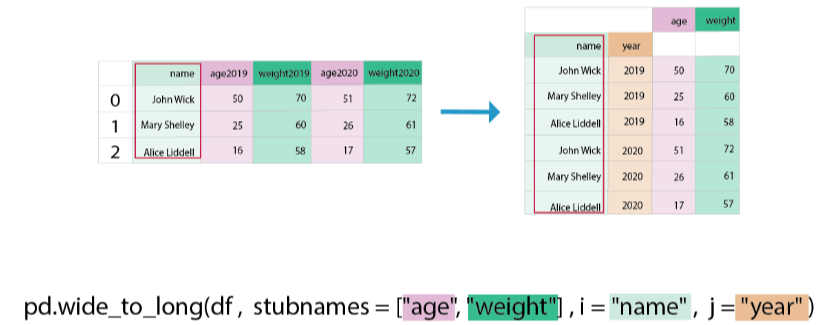

In [ ]:
books = pd.read_csv("/kaggle/input/dataplot-books/books.csv")
books

<h3 style="color:MediumSeaGreen;">Reshaping Data</h3>

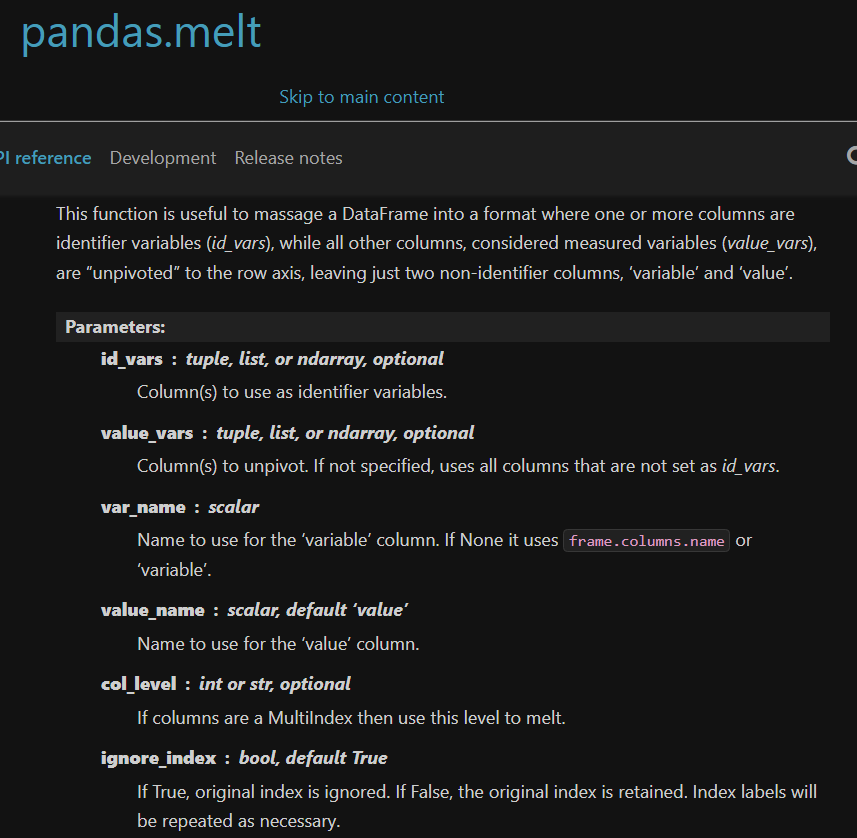

In [ ]:
pd.wide_to_long(books, stubnames = ["ratings", "sold"], i = ["title"],j = "year")

## **DataFrame with index**

In [ ]:
books_with_index = pd.read_csv("/kaggle/input/dataplot-new-books/new_books.csv")
books_with_index

In [ ]:
pd.wide_to_long(books_with_index, stubnames = ["ratings", "sold"], i = ["title", "author"], j = "year", sep = "")  

In [ ]:
another_books = pd.read_csv("/kaggle/input/books-suffix/suffix_books.csv")
another_books

In [ ]:
pd.wide_to_long(another_books, stubnames = ["ratings", "sold"], i = ["title"], j = "edition", sep = "_")

In [ ]:
pd.wide_to_long(another_books, stubnames = ["ratings", "sold"], i = ["title"], j = "edition", sep = "_", suffix = "\w+")

<h4 style="color:Orange;">The golden age</h4>

> In this exercise, you'll continue working on the book project. Now, you'll analyze books from the Golden Age.

> Upon inspection, you discovered that the dataset `golden_age` needs reshaping. You noticed that some column names start with the same prefix (stub names) and identified other columns to use as unique IDs.

> For that reason, you'll reshape your DataFrame in several ways. Use the function `wide_to_long()` along with each instruction.

> The `golden_age` dataset is available for you. It contains the `title`, `authors`, and data about the universal identifier ISBN and prefix for countries of each book.

![](https://th.bing.com/th/id/OIP.TwjjhyBpDaHjHrxC3H7BiwHaJ4?w=137&h=181&c=7&r=0&o=5&dpr=1.3&pid=1.7)

In [ ]:
golden_age = pd.read_csv("/kaggle/input/golden-age/golden_age.csv")
golden_age

1. Set `title` as the unique index. Extract the prefix from `isbn10` and `isbn13`. Name the new variable created `version`.

In [ ]:
# Reshape wide to long using title as index and version as new name, and extracting isbn prefix 
isbn_long = pd.wide_to_long(golden_age, 
                    stubnames=['isbn'], 
                    i='title', 
                    j='version')

# Print isbn_long
isbn_long

2. Set `title` and `authors` as the index. Get the prefix from `prefix10` and `prefix13`. Name the new variable version.

In [ ]:
# Reshape wide to long using title and authors as index and version as new name, and prefix as wide column prefix
prefix_long = pd.wide_to_long(golden_age, 
                      stubnames='prefix', 
                      i=['title', 'authors'], 
                      j="version")

# Print prefix_long
prefix_long

3. Set `title` and `authors` as unique indexes. Extract the prefixes `isbn` and `prefix`. Name the new variable `version`.

In [ ]:
all_long = pd.wide_to_long(golden_age, 
                   stubnames=['isbn', 'prefix'], 
                   i=["title", "authors"], 
                   j="version")

# Print all_long
all_long

<h4 style="color:Orange;">Decrypting the code</h4>